In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import inflect
%matplotlib inline
plt.style.use('ggplot')
p=inflect.engine()

In [5]:
df = pd.read_csv('data/pbp-2020.csv')
df.drop(['Unnamed: 10', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17', 'Challenger', 'IsMeasurement'], axis=1, inplace=True) # Removing empty columns

In [6]:
def is_success(row):
    if row['Down']==1 and row['Yards']/row['ToGo']>=.4:
        return 1
    elif row['Down']==2 and row['Yards']/row['ToGo']>=.60:
        return 1
    elif (row['Down']==3 or row['Down']==4) and row['Yards']>=row['ToGo']:
        return 1
    else:
        return 0

In [7]:
df.sort_values(['GameId', 'Quarter', 'Minute', 'Second'], ascending=[True, True, False, False], inplace=True) #Sorted by game and ordered by game time
df = df[df['PlayType'].notnull()]                                     # Removed null values associated with procedural warnings ie Two-Minute Warnings
df = df[df['PlayType']!='TIMEOUT']                                    # Removed timeouts
df = df[df['IsNoPlay']==0]                                            # Removed plays where the result of the play was called back
df['IsSuccess'] = df.apply(lambda row: is_success(row), axis=1)       # Added a column indicating whether or not the play was a success
rush_plays = df[df['IsRush']==1]                                      # Group Rush plays
pass_plays = df[df['IsPass']==1]                                      # Group Pass plays
teams = ['LV', 'MIN', 'TB', 'ARI', 'DEN', 'MIA', 'NYJ', 'CLE', 'NYG',
       'BAL', 'CIN', 'HOU', 'CHI', 'IND', 'PIT', 'DAL', 'WAS', 'SEA',
       'LA', 'CAR', 'TEN', 'BUF', 'KC', 'GB', 'ATL', 'NE', 'JAX', 'SF',
       'LAC', 'PHI', 'DET', 'NO']
Is_list = ['IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown', 'IsSack', 'IsChallenge', 'IsChallengeReversed', 'IsMeasurement', 'IsInterception',
    'IsFumble', 'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful', 'IsPenaltyAccepted', 'IsNoPlay']
formations = ['UNDER CENTER', 'SHOTGUN', 'NO HUDDLE SHOTGUN', 'NO HUDDLE']

In [60]:
def stat_by_formation(stat, team):
    '''This function receives a stat and a team abbreviation and returns graphs for a given team
    comparing median yards gained for each down by type of offensive formation.'''
    if stat not in Is_list:
        temp_rush_plays = rush_plays[rush_plays['OffenseTeam']==team]
        temp_pass_plays = pass_plays[pass_plays['OffenseTeam']==team]
        fig, axs = plt.subplots(1,4)
        x= np.arange(4)
        for i, ax in enumerate(axs.flatten()):
            temp_r = temp_rush_plays[temp_rush_plays['Down'] == i+1]
            temp_p = temp_pass_plays[temp_pass_plays['Down'] == i+1]
            rush_avgs = [temp_r[temp_r['Formation']==form][stat].mean() for form in formations]
            pass_avgs =[temp_p[temp_p['Formation']==form][stat].mean() for form in formations]
            ax.bar(x-.2,rush_avgs, width=.4, color='red')
            ax.bar(x,pass_avgs, width=.4, align='edge',color='blue')
            ax.set_xticks(x)
            ax.set_xticklabels(formations, rotation=45)
            ax.set_title(f'Yards by Formation for Down {i+1}: {team}')
            ax.set_xlim(-.5,3.5)
        axs[0].set_ylabel('Average {p.plural(stat)}')
        fig.set_size_inches(18,4)
        fig.tight_layout()
        # fig.savefig(f'images/YardsbyFormationfor{team}')
        fig.show()
    else:
        temp_rush_plays = rush_plays[rush_plays['OffenseTeam']==team]
        temp_pass_plays = pass_plays[pass_plays['OffenseTeam']==team]
        fig, axs = plt.subplots(1,4)
        x= np.arange(4)
        for i, ax in enumerate(axs.flatten()):
            temp_r = temp_rush_plays[temp_rush_plays['Down'] == i+1]
            temp_p = temp_pass_plays[temp_pass_plays['Down'] == i+1]
            rush_sums = [temp_r[temp_r['Formation']==form][stat].sum() for form in formations]
            pass_sums =[temp_p[temp_p['Formation']==form][stat].sum() for form in formations]
            ax.bar(x-.2,rush_sums, width=.4, color='red')
            ax.bar(x,pass_sums, width=.4, align='edge',color='blue')
            ax.set_xticks(x)
            ax.set_xticklabels(formations, rotation=45)
            ax.set_title(f'Yards by Formation for Down {i+1}: {team}')
            ax.set_xlim(-.5,3.5)
            ax.set_ylim(0,18)
        axs[0].set_ylabel(f'Sum of {p.plural(stat)}')
        fig.set_size_inches(18,4)
        fig.tight_layout()
        # fig.savefig(f'images/YardsbyFormationfor{team}')
        fig.show()


<ipython-input-60-7807fbe42f87>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-60-7807fbe42f87>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-60-7807fbe42f87>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-60-7807fbe42f87>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-60-7807fbe42f87>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-60-7807fbe42f87>:24: UserWarning: Matplotlib 

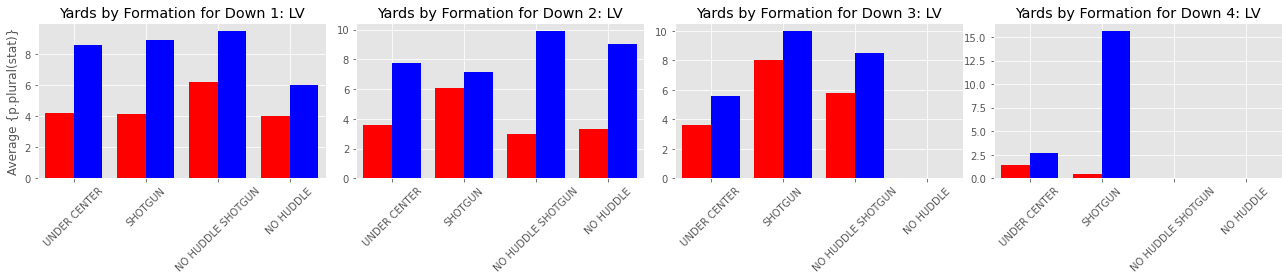

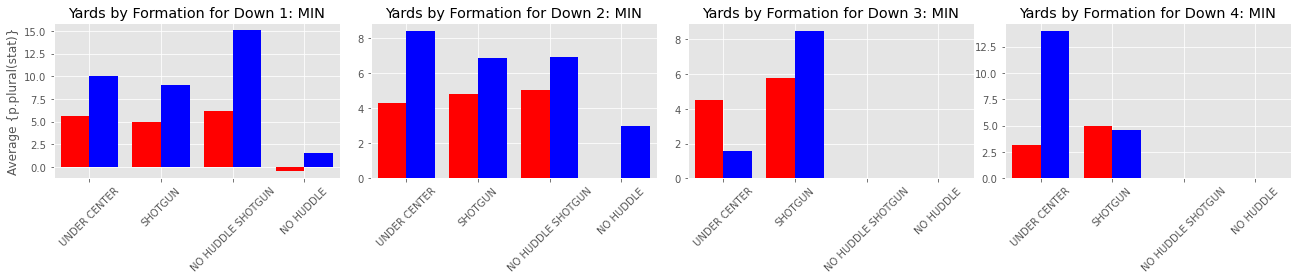

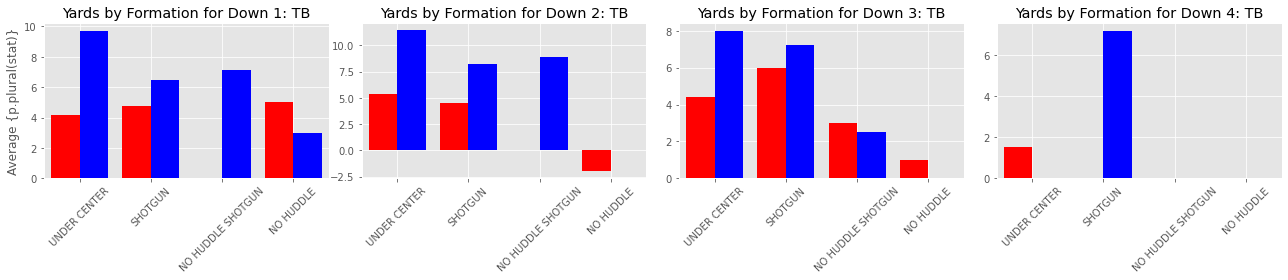

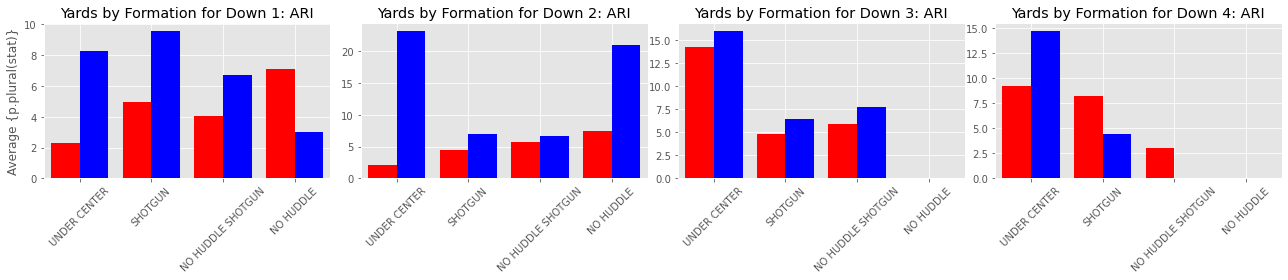

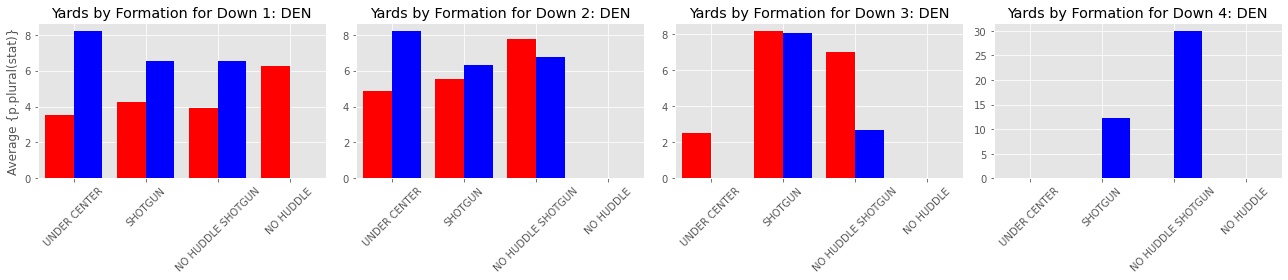

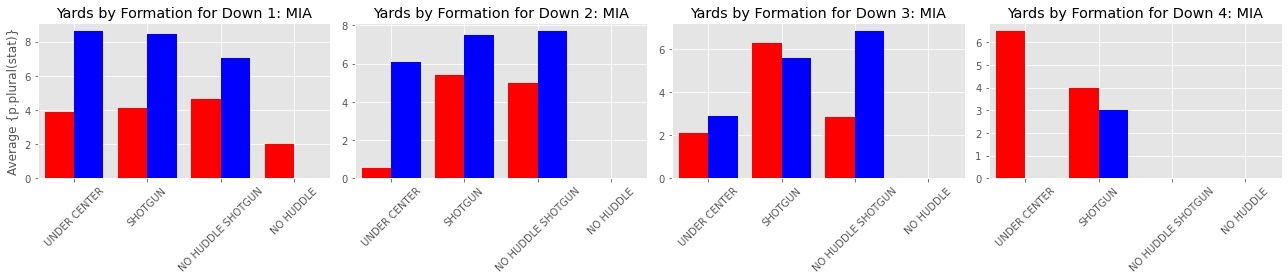

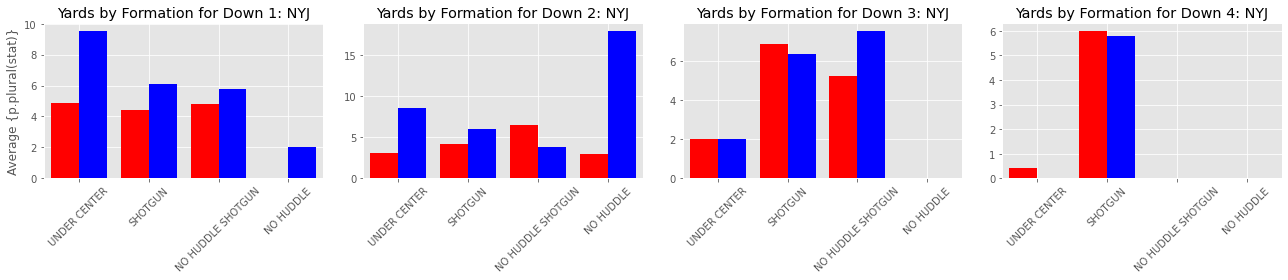

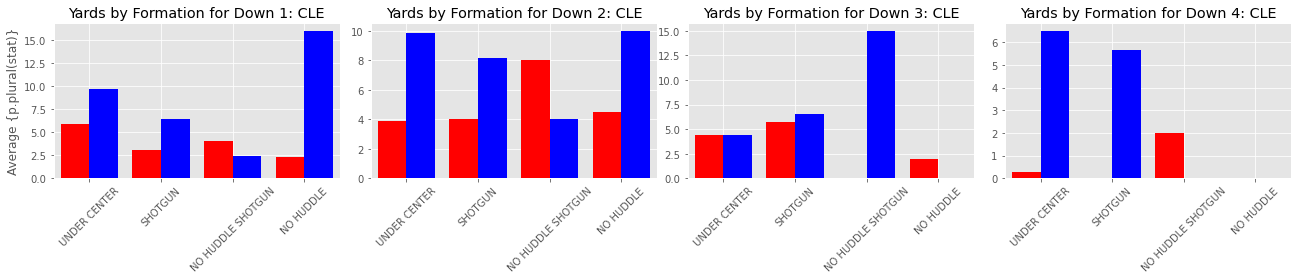

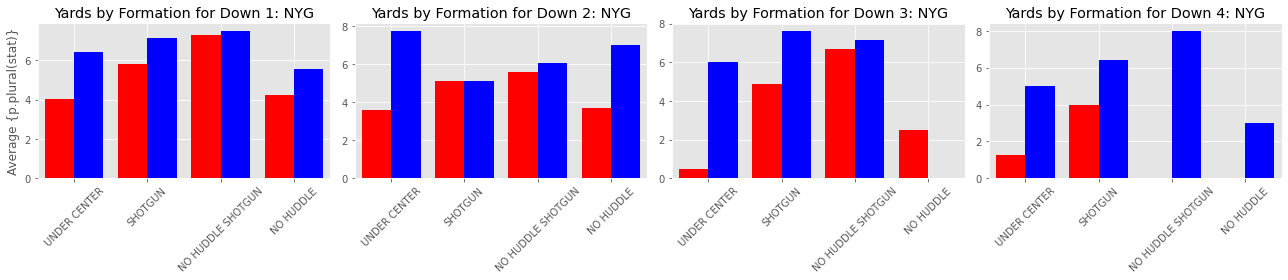

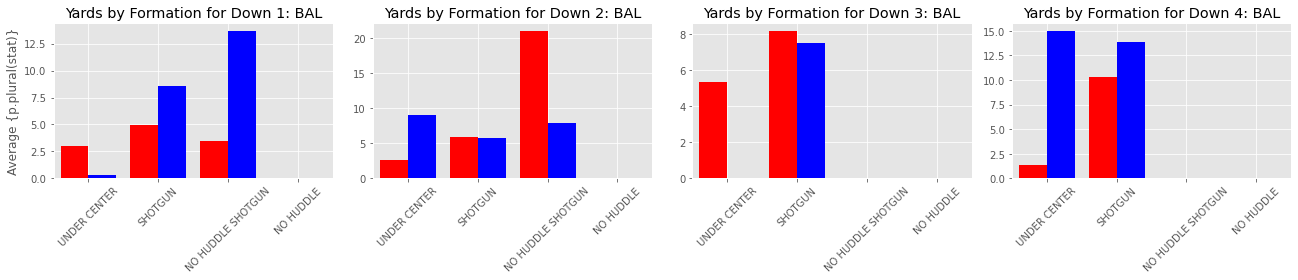

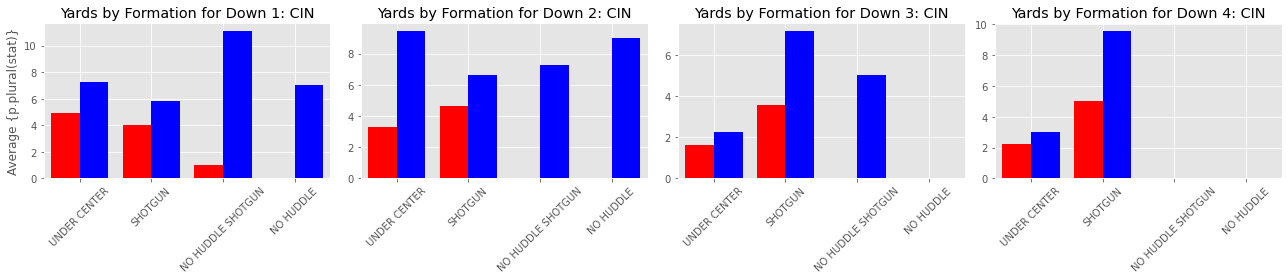

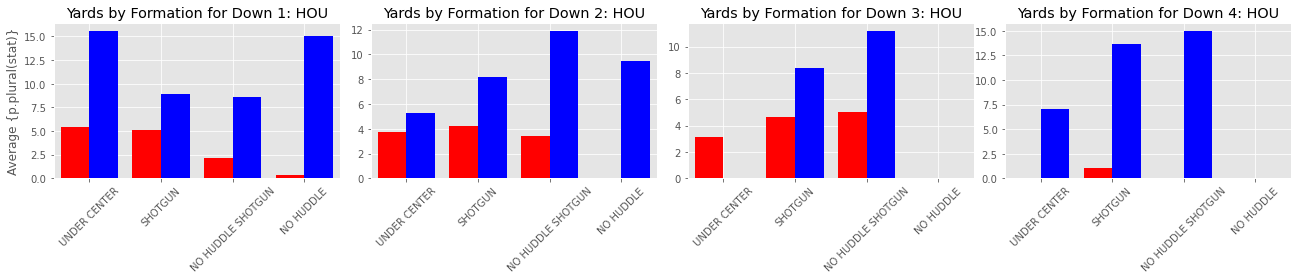

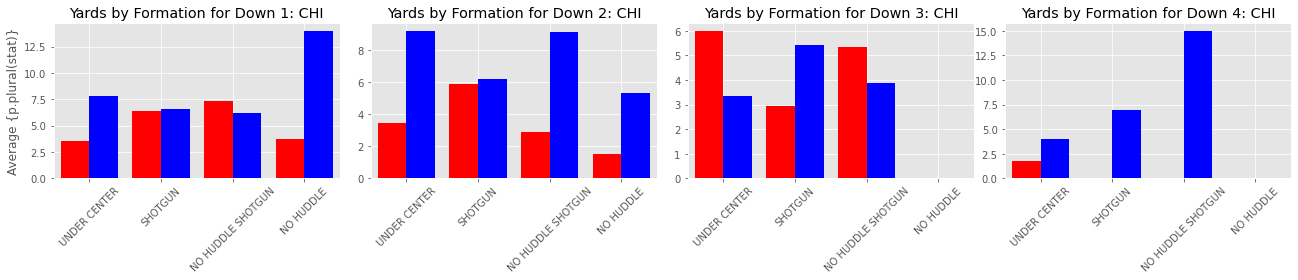

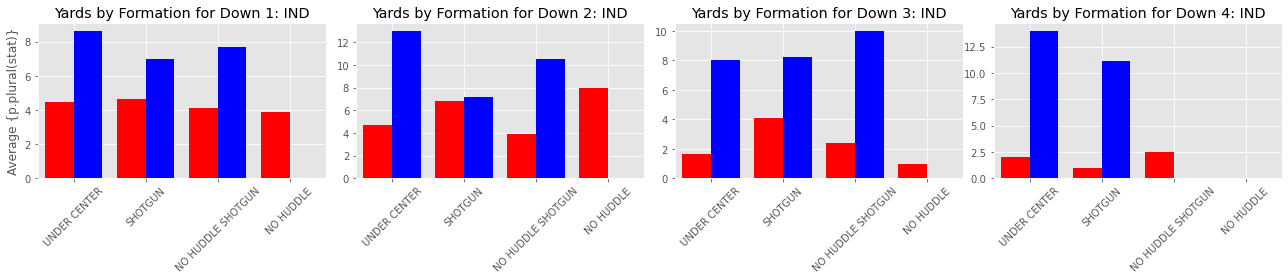

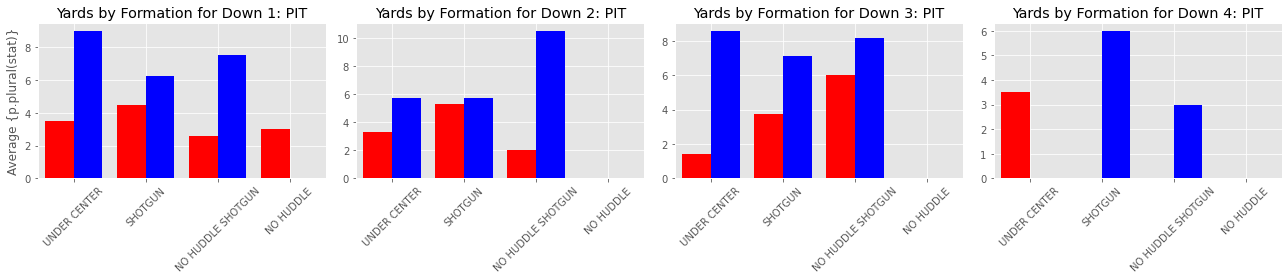

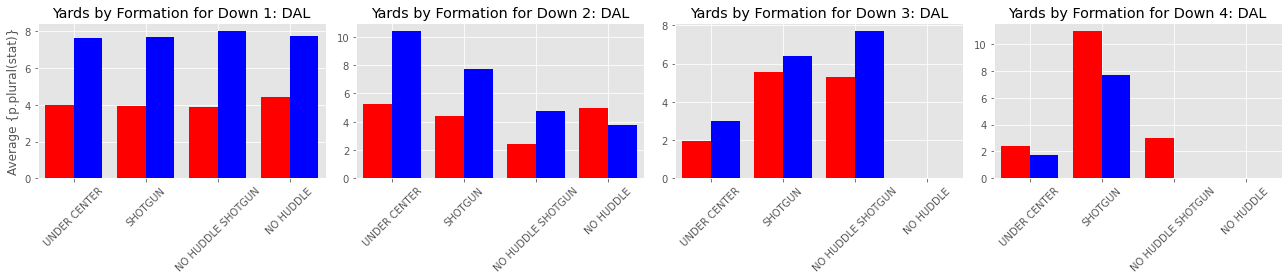

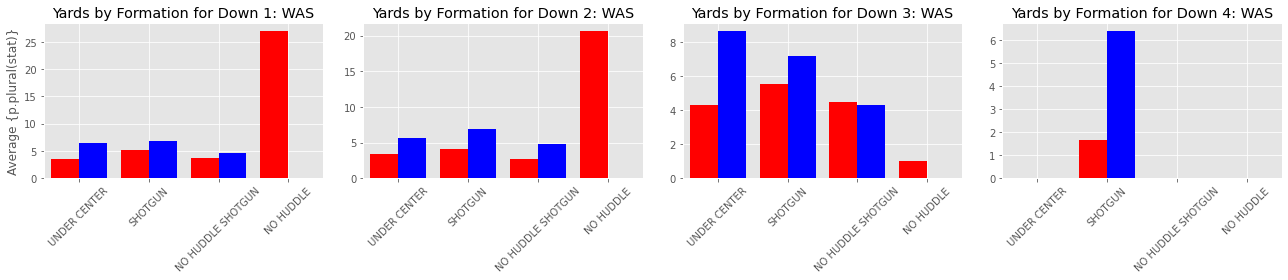

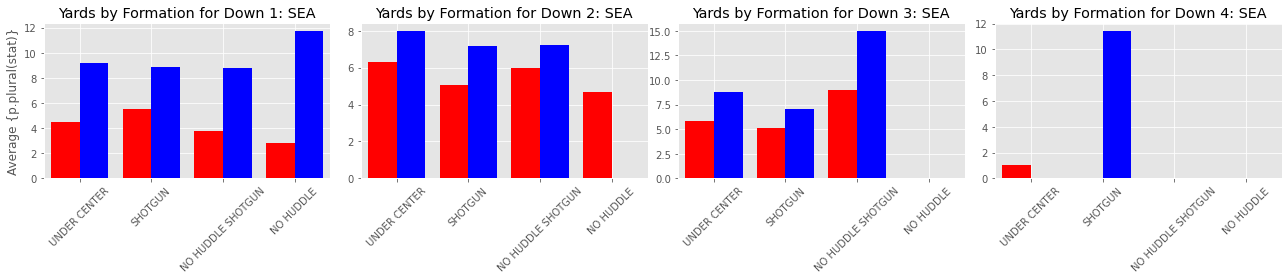

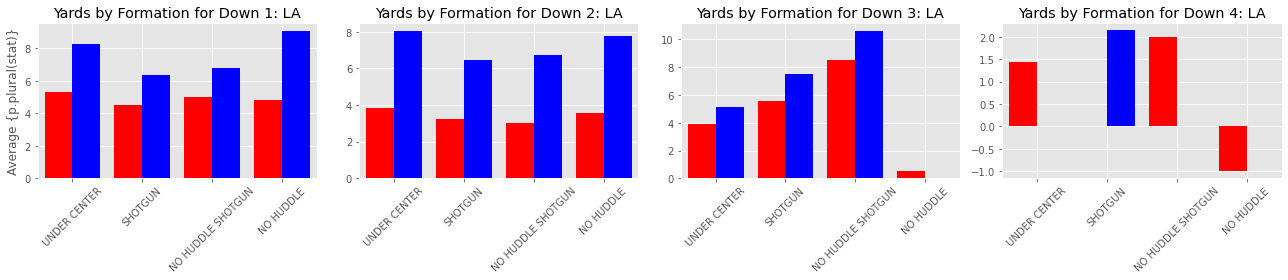

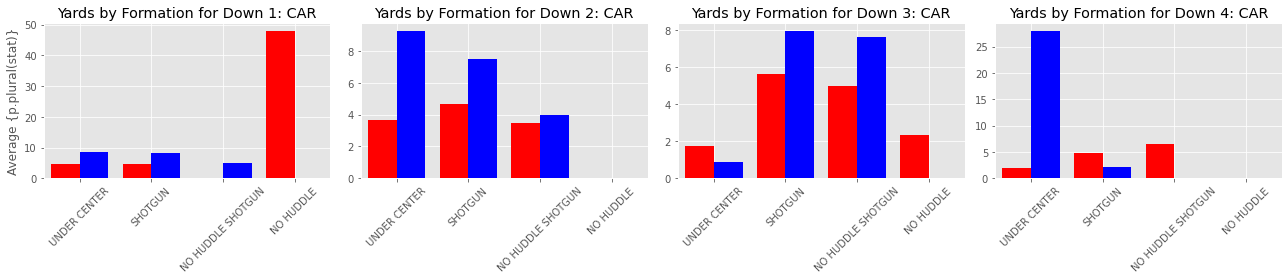

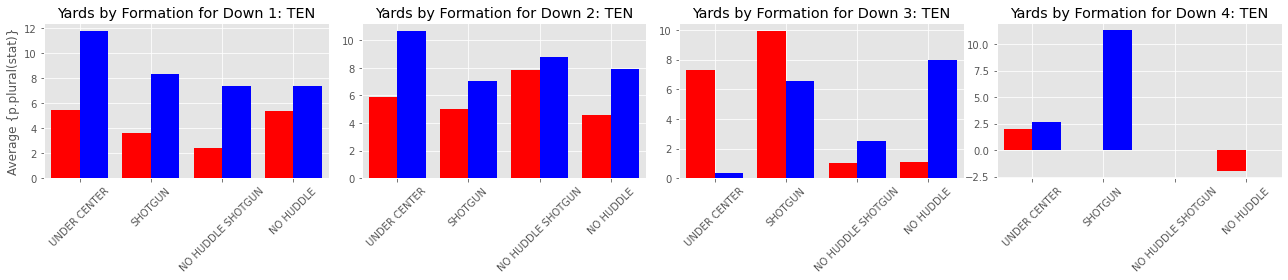

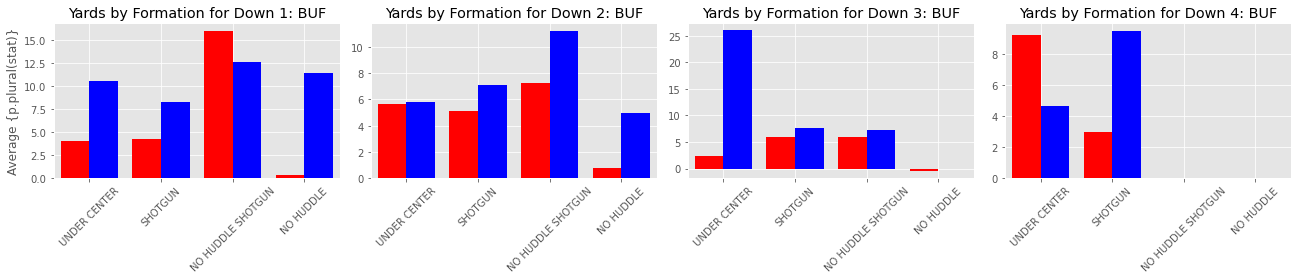

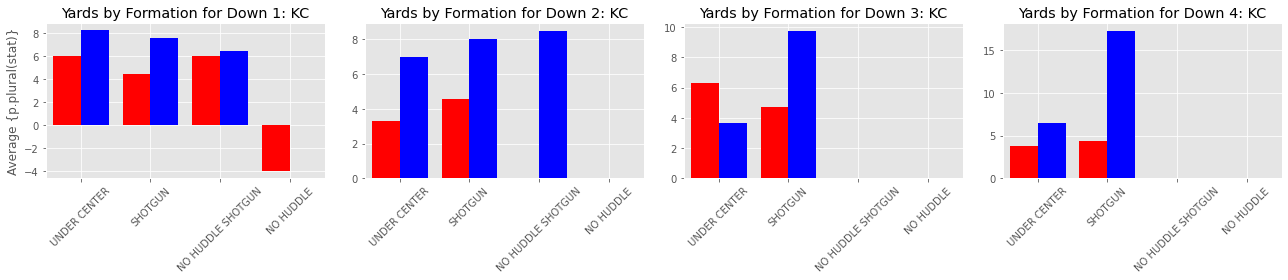

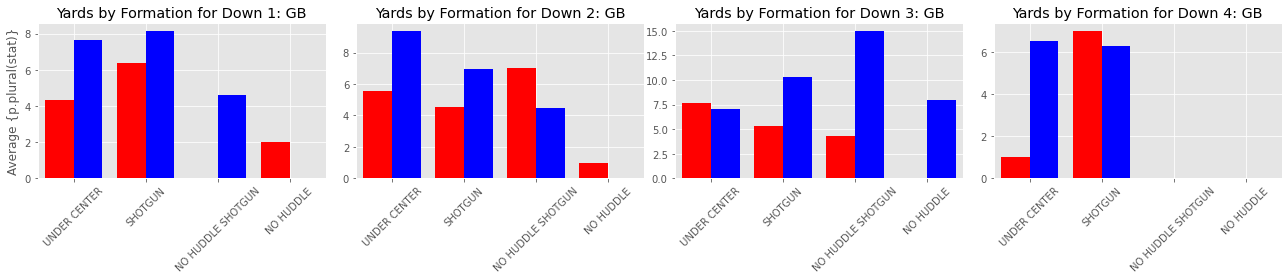

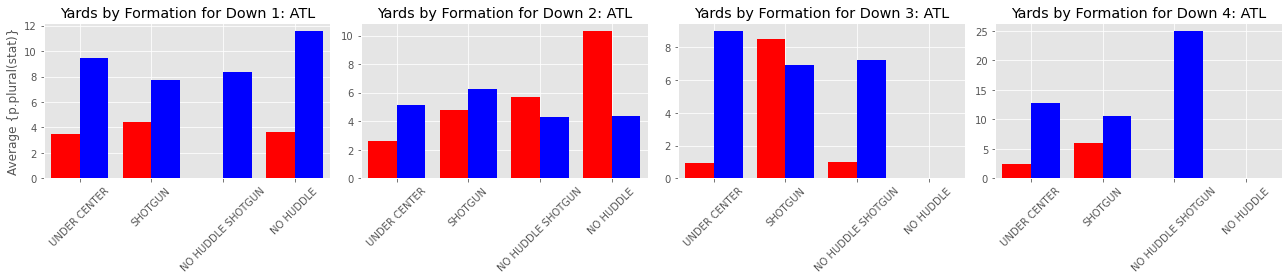

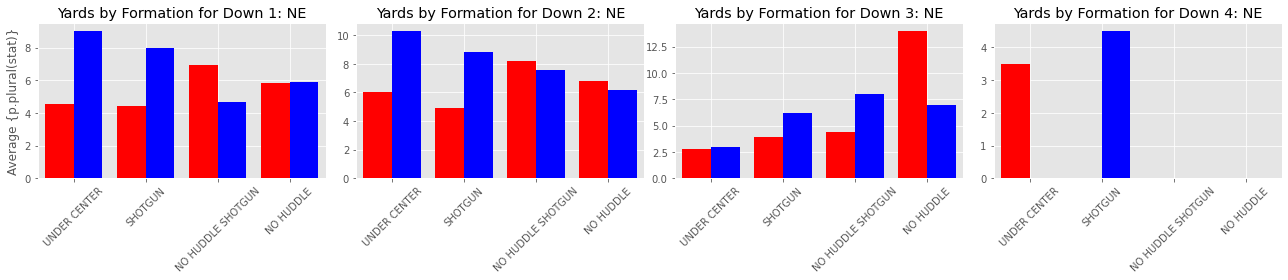

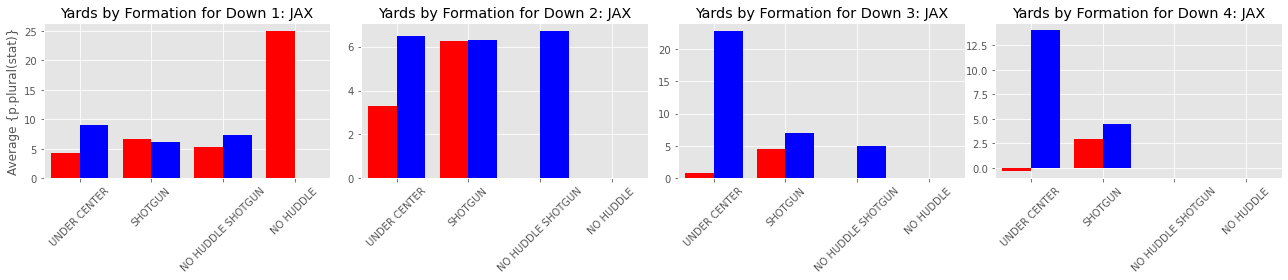

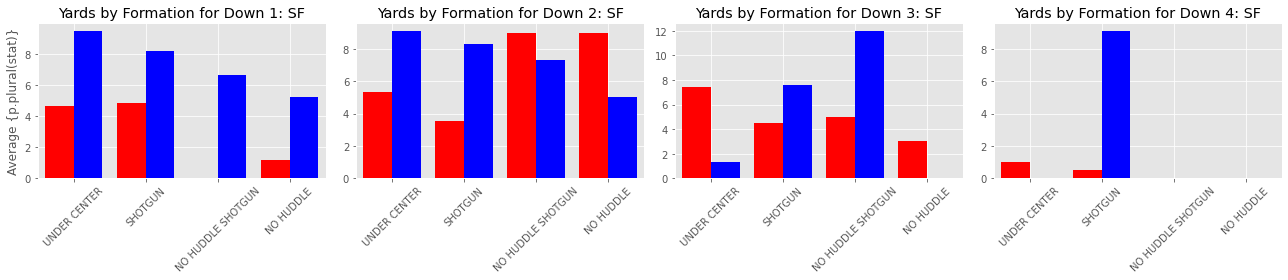

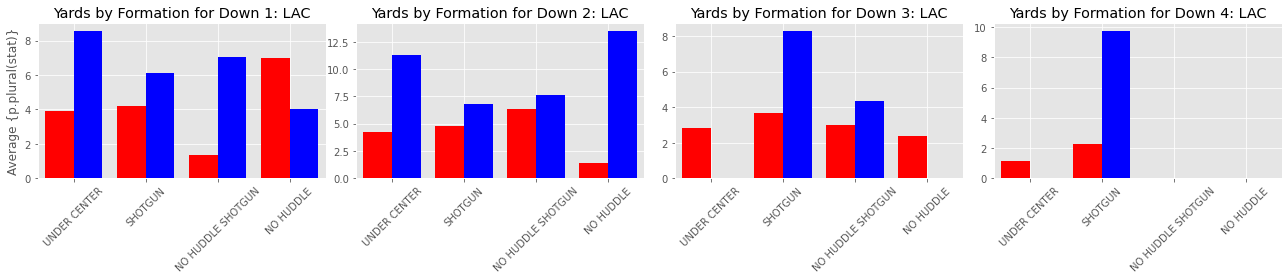

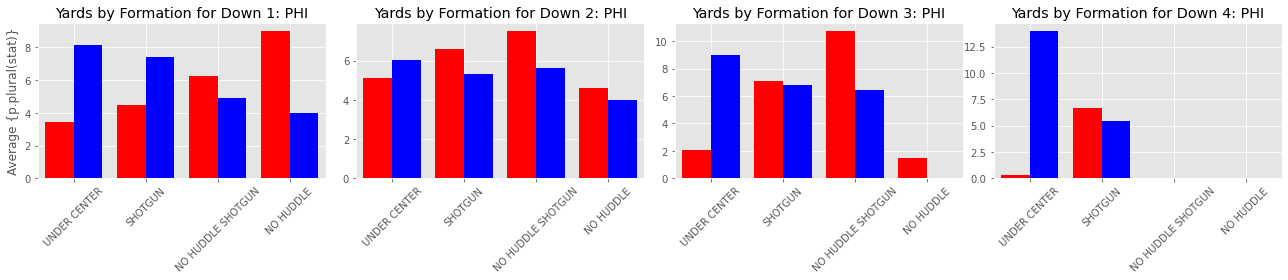

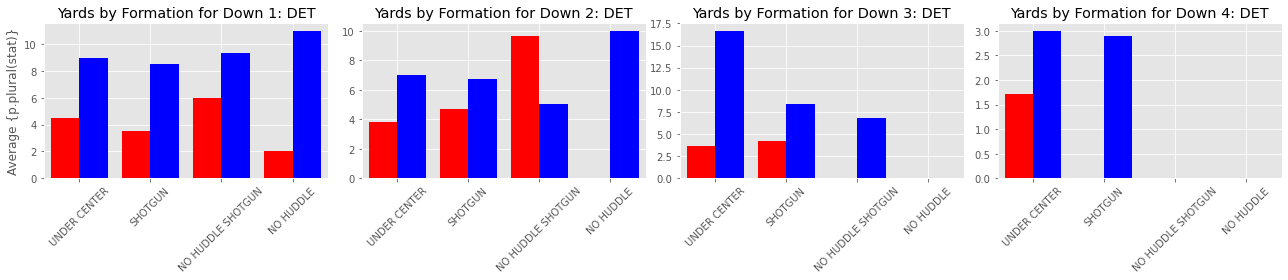

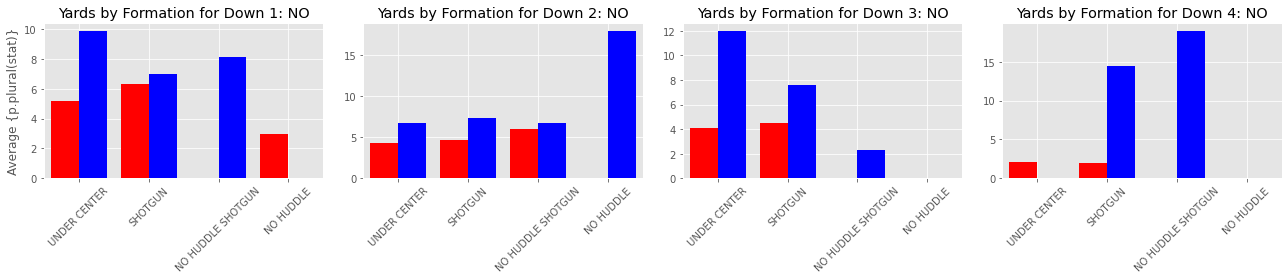

In [61]:
for team in teams:
    stat_by_formation('Yards', team)